In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

(1797, 64)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']) [0 1 2 ... 8 9 8]
[0 1 2 3 4 5 6 7 8 9]


C:\Users\AI02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

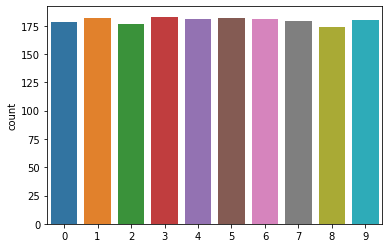

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)
print(digits.keys(), digits.target)
print(np.unique( digits.target ) )
sns.countplot(digits.target)

In [9]:
X = digits.data             # 입력  
y = digits.target == 9      # 출력
y[0:20]

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\AI02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AI02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'test')

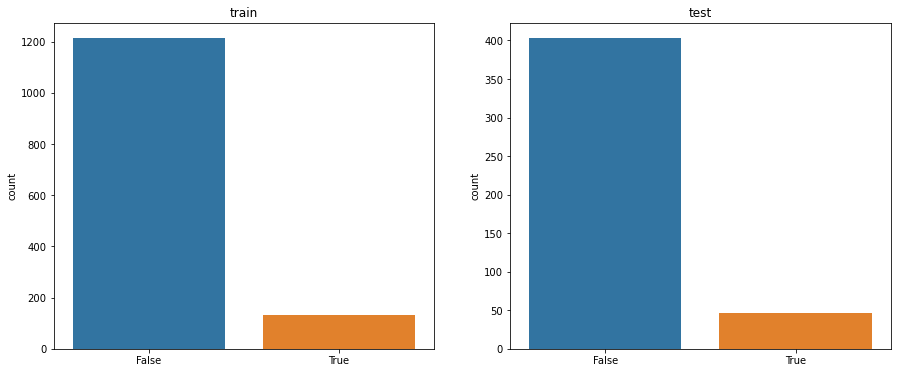

In [11]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
# y_train의 값 확인
sns.countplot(y_train)
plt.title("train")

plt.subplot(1, 2, 2)
# y_test의 값 확인
sns.countplot(y_test)
plt.title("test")

In [12]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_model.predict(X_test)

print("예측된 레이블의 고유값: {}".format(np.unique(pred_most_frequent)))
print("테스트 평가 정확도 : {:.2f}".format(dummy_model.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 평가 정확도 : 0.90


In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

print("학습용 평가 정확도 : {:.2f}".format(tree.score(X_train, y_train)))
print("테스트 평가 정확도: {:.2f}".format(tree.score(X_test, y_test)))

학습용 평가 정확도 : 0.94
테스트 평가 정확도: 0.92


In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)

print("학습용 평가 정확도 : {:.2f}".format(logreg.score(X_train, y_train)))
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

학습용 평가 정확도 : 1.00
logreg 점수: 0.98


C:\Users\AI02\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


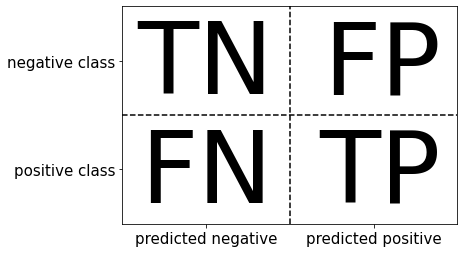

In [15]:
import mglearn

mglearn.plots.plot_binary_confusion_matrix()

In [16]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[402   1]
 [  6  41]]


In [18]:
from sklearn.metrics import f1_score

# 빈도기반 모델 f1-score
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_most_frequent)))

# 의사결정트리
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))

# 로지스틱 
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))

무작위 더미 모델의 f1 score: 0.00
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                           target_names=["not 9", "is 9"]))

              precision    recall  f1-score   support

       not 9       0.90      1.00      0.94       403
        is 9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



C:\Users\AI02\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AI02\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AI02\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print(classification_report(y_test, 
                            pred_logreg,
                            target_names=["not 9", "is 9"]))

              precision    recall  f1-score   support

       not 9       0.99      1.00      0.99       403
        is 9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import mglearn
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [22]:
from mglearn.datasets import make_blobs 

### 데이터 만들기
X, y = make_blobs(n_samples=(400, 50), 
                  centers=2, 
                  cluster_std=[7.0, 2],         # 클러스터의 표준 편차
                  random_state=42)
                     
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

(450, 2) (450,)


C:\Users\AI02\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


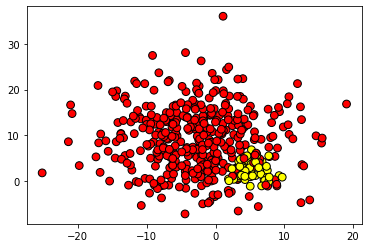

In [23]:
plt.scatter(X[:,0], X[:,1], 
            c=y, 
            cmap=plt.cm.autumn, s=60, edgecolors='k')

In [24]:
svc = SVC(gamma=.05).fit(X_train, y_train)   
pred = svc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       107
           1       0.42      0.83      0.56         6

    accuracy                           0.93       113
   macro avg       0.70      0.88      0.76       113
weighted avg       0.96      0.93      0.94       113



In [25]:
pred = svc.decision_function(X_test)

print(pred[0:10])
np.min(pred), np.max(pred)

[-1.0167542   0.72583536 -1.17766946 -1.00425497 -1.0002495  -0.99977182
 -1.07285711 -1.2206812  -1.24018502 -1.30361098]


(-1.509707253620952, 1.6245457437087478)

In [32]:
decision_0 = svc.decision_function(X_test)   > 0     # 임계값을 0으로 
decision_m08 = svc.decision_function(X_test) > -.8   # 임계값을 -0.8로

In [39]:
pos_num = decision_0.sum()
neg_num = len(decision_0) - pos_num
print("임계값 0일때 : 1(양성) 개수 {}개, 0(음성) 개수 {}개".format(pos_num, neg_num) )

임계값 0일때 : 1(양성) 개수 12개, 0(음성) 개수 101개


In [40]:
print("임계값 0 일때    : 0 (음성) 개수 :", len(decision_0) - decision_0.sum()) 
print("임계값 -0.8 일때 : 0 (음성) 개수 :", len(decision_m08) - decision_m08.sum() ) 

임계값 0 일때    : 0 (음성) 개수 : 101
임계값 -0.8 일때 : 0 (음성) 개수 : 95


In [41]:
y_pred_0 = svc.decision_function(X_test)   > 0 
y_pred_08 = svc.decision_function(X_test) > -.8

# 임계값 0
print(classification_report(y_test, y_pred_0))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       107
           1       0.42      0.83      0.56         6

    accuracy                           0.93       113
   macro avg       0.70      0.88      0.76       113
weighted avg       0.96      0.93      0.94       113



In [42]:
print(classification_report(y_test, y_pred_08))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       107
           1       0.33      1.00      0.50         6

    accuracy                           0.89       113
   macro avg       0.67      0.94      0.72       113
weighted avg       0.96      0.89      0.92       113



In [45]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import warnings
warnings.filterwarnings(action='ignore')

In [46]:
### 한글
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
    
matplotlib.rcParams['axes.unicode_minus'] = False

In [51]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [52]:
from mglearn.datasets import make_blobs 
X, y = make_blobs(n_samples=(400, 50), 
                  centers=2, cluster_std=[7.0, 2],        
                  random_state=22)
                     
print(X.shape, y.shape)

(450, 2) (450,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [59]:
# SVC 모델
pred = svc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [60]:
# 의사결정 트리 모델
pred = tree.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       104
           1       0.37      0.78      0.50         9

    accuracy                           0.88       113
   macro avg       0.67      0.83      0.71       113
weighted avg       0.93      0.88      0.90       113



In [61]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, 
                                                       svc.decision_function(X_test))

In [62]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), 
                  centers=2, 
                  cluster_std=[7.0, 2],
                  random_state=22)

print(X.shape, y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

(4500, 2) (4500,)


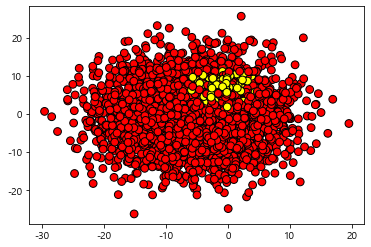

In [63]:
plt.scatter(X[:,0], X[:,1], 
            c=y, 
            cmap=plt.cm.autumn,  # plt.cm.Blues, RdYlGn, BrBG, Greens, RdGy, YlOrRd, autumn
            s=60, edgecolors='k')  

In [64]:
svc = SVC(gamma=.05).fit(X_train, y_train)

pred = svc.decision_function(X_test)  #  0의 값을 기준으로 분포
print(pred[0:10])

[-1.09425577 -1.10667545 -1.10736997 -1.19140534 -1.22918652 -1.19749983
 -1.17059048 -1.24720063 -1.19551381 -1.11214569]


임계값 :  -1.5528391475651482 1.4968799824567065
983


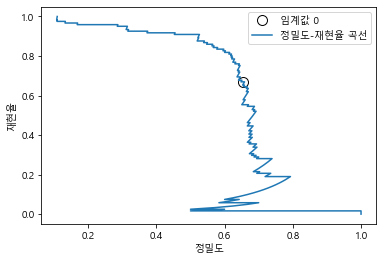

In [65]:
precision, recall, thresholds = precision_recall_curve(y_test, pred)

print("임계값 : ", thresholds.min(),  thresholds.max())

# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))  # thresholds의 절대값이 가장 작은 것(위치)
print(close_zero)  

plt.plot(precision[close_zero], 
         recall[close_zero], 'o', 
         markersize=10,
         label="임계값 0", 
         fillstyle="none", c='k')

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
pred =  rf.predict_proba(X_test)[:, 1]
pred

array([0.  , 0.  , 0.  , ..., 0.  , 0.66, 0.  ])

45


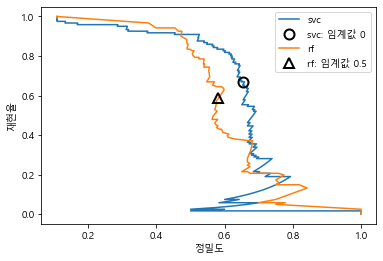

In [67]:
# SVC모델 그래프
plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], 
         recall[close_zero], 'o', 
         markersize=10,
         label="svc: 임계값 0", 
         fillstyle="none", 
         c='k', 
         mew=2)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, pred)

# 랜덤포레스트 그래프
plt.plot(precision_rf, recall_rf, label="rf")

close_zero_rf = np.argmin(  np.abs(thresholds_rf - 0.5)  )   # 임계값이 0.5 위치
print(close_zero_rf)

plt.plot(precision_rf[close_zero_rf], recall_rf[close_zero_rf], '^', c='k',
         markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

In [68]:
from sklearn.metrics import f1_score

rf_f1score = f1_score(y_test, rf.predict(X_test) )
svc_f1score = f1_score(y_test, svc.predict(X_test))

print("랜덤 포레스트의 f1_score: {:.3f}".format(rf_f1score))
print("svc의 f1_score: {:.3f}".format(svc_f1score))

랜덤 포레스트의 f1_score: 0.573
svc의 f1_score: 0.661


In [69]:
from sklearn.metrics import average_precision_score

## 확률 예측 
rf_pro = rf.predict_proba(X_test)[:, 1]
svc_dcfun = svc.decision_function(X_test)

ap_rf = average_precision_score(y_test, rf_pro)
ap_svc = average_precision_score(y_test, svc_dcfun)

print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.608
svc의 평균 정밀도: 0.632


In [70]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

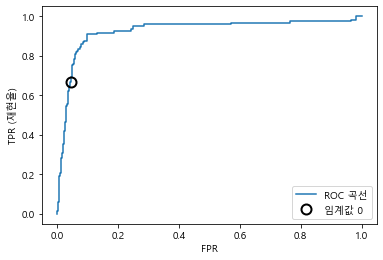

In [71]:
plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")

# 임계값이 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

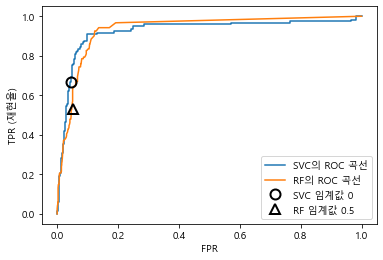

In [72]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)

close_05_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_05_rf], tpr[close_05_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)